In [8]:
import os, sys
import pandas as pd

sys.path.append("../model_explorer/third_party/yolop_det_seg")

from model_explorer.result_handling.collect_results import collect_results

In [11]:
data_folder = '../results_diss/'
pkls = [os.path.join(data_folder, p) for p in ['yolo_8x8.pkl', 'resnet_8x8_rerun.pkl']]

In [12]:
result_collections = [collect_results(pkl) for pkl in pkls]
dfs = [r.to_dataframe() for r in result_collections]

for df in dfs:
    df['F_0'] = -df['F_0']
    df['F_1'] = -df['F_1']

In [13]:
import numpy as np

def is_pareto_efficient_dumb(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]<c, axis=1)) and np.all(np.any(costs[i+1:]<c, axis=1))
    return is_efficient

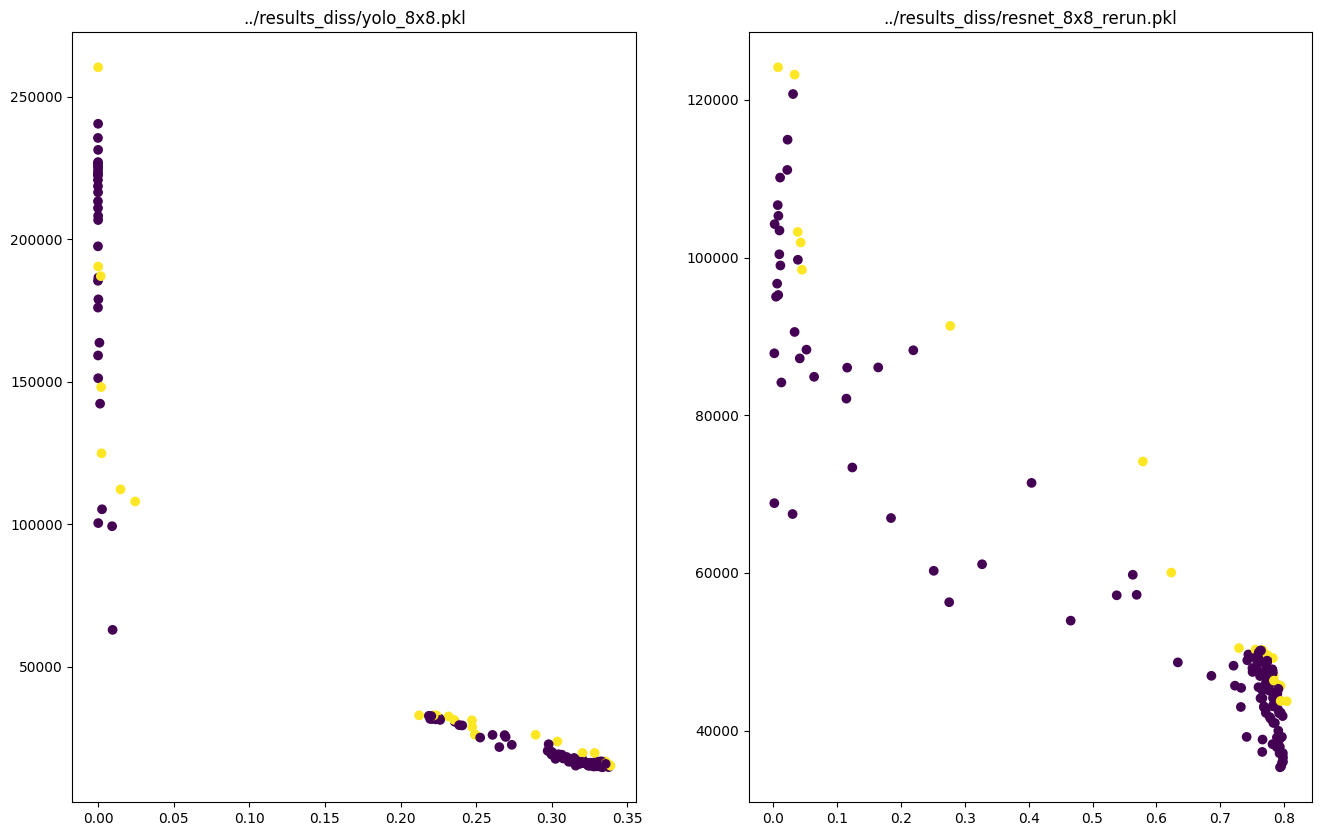

: 

In [15]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
axes = ax.flatten()
datas = {}

for ax, df, fn in zip(axes, dfs, pkls):
    # ax.set_xlim(left=0.6, right=0.82)
    points = df[['F_0', 'F_1']].to_numpy()

    pareto_information = is_pareto_efficient_dumb(points)
    pareto_information = np.expand_dims(pareto_information, 1)

    data = np.hstack([points, pareto_information])
    datas[fn] = data

    ax.scatter(data[:,0], data[:,1], c=data[:,2])
    ax.set_title(fn)

plt.show()

In [55]:
print(datas.keys())

for row in datas['../results_diss/resnet50_8x8.pkl']:
    domstr = 'dom' if row[2] == 0 else 'nondom'
    if row[0] > 0.65:
        print(f"{row[0]*100:.4f},{row[1]:.4f},{domstr}")

dict_keys(['../results_diss/resnet50_4x4.pkl', '../results_diss/resnet50_8x8.pkl', '../results_diss/resnet50_16x16.pkl', '../results_diss/resnet50_1x16.pkl'])
74.7314,47587.3860,dom
74.2920,48135.6677,dom
74.1455,46683.7295,dom
73.7061,48968.3901,dom
70.4590,62586.1558,nondom
67.4561,55265.8157,dom
65.4297,62441.4561,dom
65.2100,58341.5845,dom
75.2930,46961.6741,dom
75.0977,45818.5090,dom
74.8047,48900.2959,dom
74.7559,46185.3289,dom
74.4873,44832.9041,dom
73.9990,46547.0713,dom
70.2881,63511.2405,nondom
70.2148,60391.9236,dom
69.8730,62910.3237,dom
68.8232,50708.4744,dom
76.5137,44919.5757,dom
75.2197,46264.4048,dom
75.7812,43829.4126,dom
75.2930,44058.9600,dom
75.0977,46251.9160,dom
74.9512,49342.8669,dom
74.8535,47354.9700,dom
74.7803,47687.3899,dom
74.5605,48237.3806,dom
76.9287,43463.0796,dom
78.4180,41634.6165,dom
75.5127,47068.1870,dom
76.3672,46346.6890,dom
75.0732,49575.5217,dom
75.4639,46738.1602,dom
76.1475,44855.0698,dom
75.4395,46448.7361,dom
75.6348,43037.5237,dom
75.5859

In [59]:
df['accuracies']
# df.columns

0        [0.7470703125]
1      [0.414794921875]
2       [0.05712890625]
3      [0.050048828125]
4      [0.044677734375]
             ...       
134     [0.75048828125]
135       [0.755859375]
136     [0.78369140625]
137    [0.802490234375]
138    [0.750244140625]
Name: accuracies, Length: 139, dtype: object

## Yolov5s

In [36]:
data_folder = '../results/'
csvs = [os.path.join(data_folder, p) for p in ['yolo_1x16.csv', 'yolo_8x8.csv', 'yolo_16x16.csv', 'yolo_1x16.csv']]

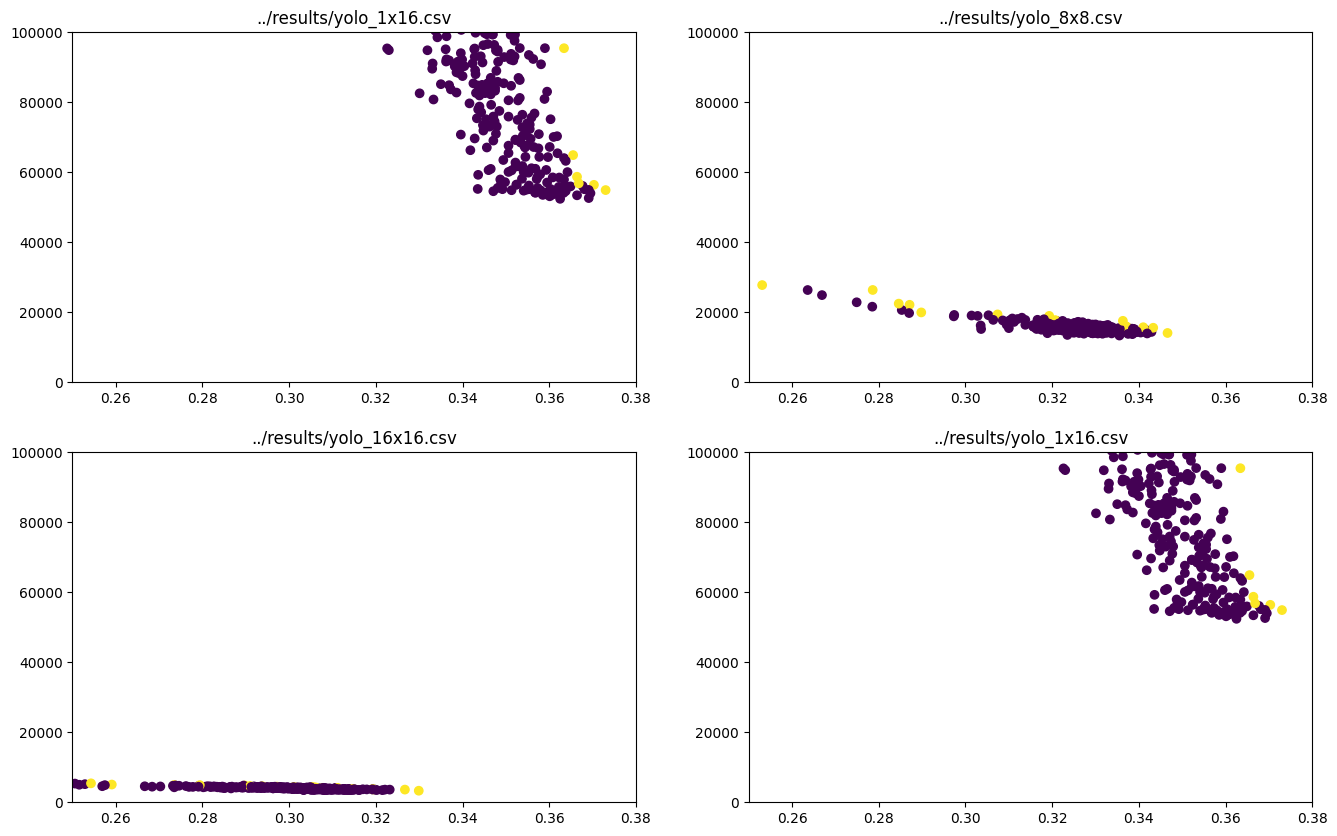

In [49]:
dfs = [pd.read_csv(f) for f in csvs]

fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
axes = ax.flatten()
datas = {}

for ax, df, fn in zip(axes, dfs, csvs):
    ax.set_xlim(left=0.25, right=0.38)
    ax.set_ylim(0, 100000)
    points = df[['accs', 'blocks']].to_numpy()

    pareto_information = is_pareto_efficient_dumb(points)
    pareto_information = np.expand_dims(pareto_information, 1)

    data = np.hstack([points, pareto_information])
    datas[fn] = data

    ax.scatter(data[:,0], data[:,1], c=data[:,2])
    ax.set_title(fn)

plt.show()

In [46]:
for row in datas['../results/yolo_8x8.csv']:
    domstr = 'dom' if row[2] == 0 else 'nondom'
    if row[0] > 0.28:
        print(f"{row[0]:.4f},{row[1]:.4f},{domstr}")

0.3253,15199.6880,dom
0.3296,15258.6572,dom
0.3053,19151.5869,dom
0.3296,15139.2573,dom
0.2871,22140.3394,nondom
0.3014,19073.7598,dom
0.3028,18960.0327,dom
0.3074,19392.1987,nondom
0.3193,15364.8667,dom
0.2853,20653.2754,dom
0.3361,14883.5547,dom
0.3379,15205.1777,dom
0.2846,22469.9697,nondom
0.3261,14930.7310,dom
0.2973,18837.4858,dom
0.3120,18068.2964,dom
0.3064,17825.1768,dom
0.3345,14762.1543,dom
0.3166,17855.0742,dom
0.2898,19961.4277,nondom
0.3156,16232.3130,dom
0.3230,15916.3726,dom
0.3239,15768.4692,dom
0.3268,14662.0537,dom
0.3108,18227.1421,dom
0.3214,16152.8486,dom
0.3207,16725.3354,dom
0.3264,16115.9170,dom
0.2870,19779.6128,dom
0.3130,18453.3965,dom
0.3193,18972.7559,nondom
0.3201,14842.9390,dom
0.3174,16045.4746,dom
0.2974,19234.9062,dom
0.3287,15630.9863,dom
0.3204,14796.6938,dom
0.3251,15308.4409,dom
0.3192,15432.9595,dom
0.3138,16412.6924,dom
0.3362,15600.0342,dom
0.3297,15575.3828,dom
0.3328,14921.3179,dom
0.3276,15063.7617,dom
0.3304,14631.4219,dom
0.3276,15457.3394

## before and after sparsity